In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Генерируем выборку

In [6]:
N = 1000
K = 10000
theta = 5
sample = np.array(sts.uniform.rvs(loc = 0, scale = theta, size = N*K)).reshape(N, K)

In [24]:
print sample.shape

(1000, 10000)


Считаю оценки максимального правдоподобия и данную в условиях

In [29]:
omp = np.ones_like(sample)
mark = np.ones_like(sample)
for n in xrange(N):
    for j in xrange(K):
        omp[n][j] = np.max(sample[:n + 1,j])
        mark[n][j] = (2./(n + 1) * np.sum(sample[:n + 1,j]) + np.max(sample[:N + 1,j]))/2

Считаю дисперсии этих оценок

In [30]:
omp_disp = np.ones(N)
mark_disp = np.ones(N)

for n in xrange(N):
    omp_disp[n] = np.var(omp[n])
    mark_disp[n] = np.var(mark[n])

Графики дисперсий

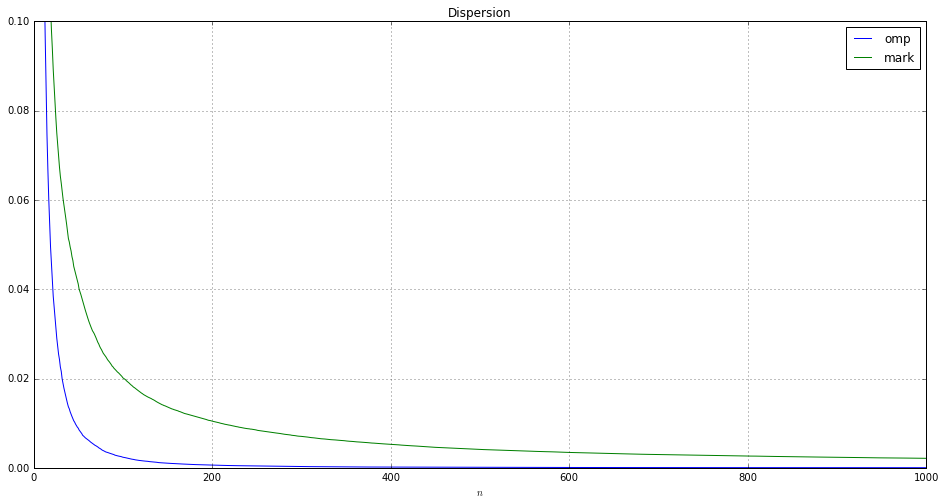

In [31]:
plt.figure(figsize=(16, 8))
n = np.arange(0, N, 1)

plt.plot(n, omp_disp, label='omp')
plt.plot(n, mark_disp, label='mark')

plt.ylim((0, 0.1))  # размеры графика по вертикальной оси 
plt.xlabel('$n$')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Dispersion')  # имя графика
plt.grid()  # добавляем сетку
plt.legend()
plt.show()

## Вывод

ОМП точнее чем данная в условиях задачи оценка поскольку $X_{n}$ точнее приближает $\theta$ чем среднее от $2\overline{X}$ и $X_{n}$ и, поэтому у нее меньший разброс (дисперсия).